# **Dataset Description**
**Customer Segmentation Clustering**

Tujuan dari project ini adalah untuk menemukan pola dari perilaku customer dan dibagi menjadi beberapa cluster untuk bisa menjadi sebuah insight.


**Ket. Dataset**
*   CustomerID = Identitas tiap customer
*   Gender = Jenis Kelamin Customer
*   Age = Umur Customer
*   Annual Income = Income per bulan
*   Spending Score = Score Customer dalam membelanjakan uang mereka (1-100)

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Read Data from G-Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  Get Dataset https://drive.google.com/file/d/1TMqMjaISMkGxJ-mbJVWPte-i2ba4EuOV/view?usp=sharing
df = pd.read_csv("/content/drive/MyDrive/Dataset18_Clustering_Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Analysis**

In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


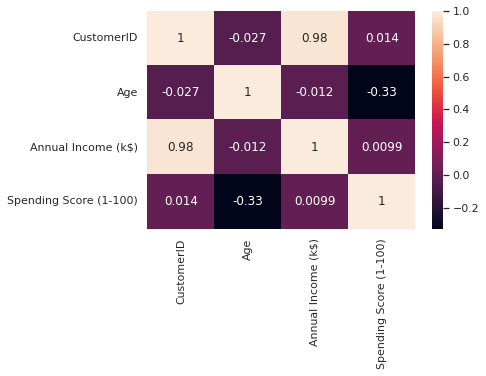

In [ ]:
# Show correlation between feature
sns.heatmap(df.corr(), annot=True)

**Hipotesa Awal**

*   Semakin tua maka spending semakin jarang / Semakin muda, makin sering spending.
*   Semakin tinggi annual income (gaji) semakin sering belanja.



# **Data Visualization**

**Age**

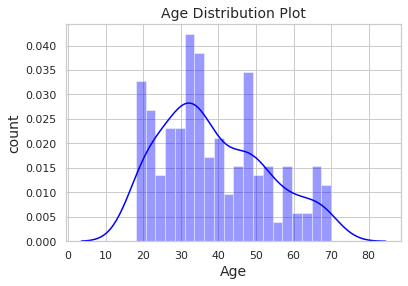

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Age'], color = "blue", bins=20)
plt.title("Age Distribution Plot", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

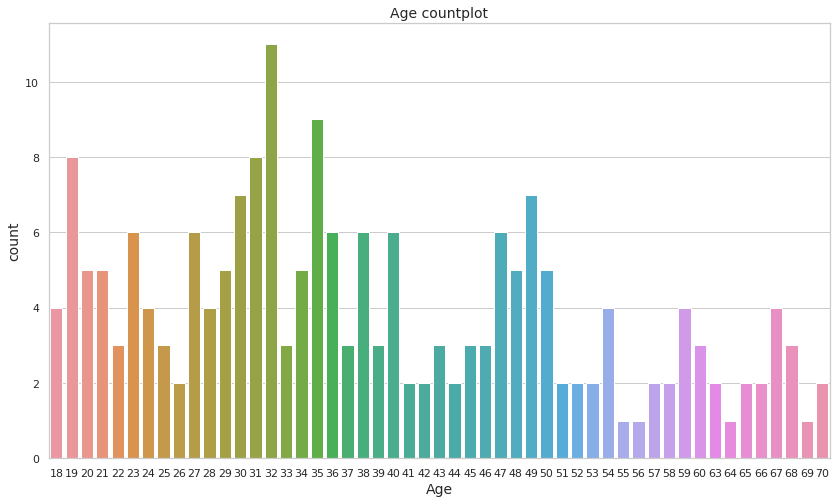

In [ ]:
# Countplot
plt.figure(figsize=(14,8))
sns.countplot(df['Age'])
plt.title("Age countplot", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

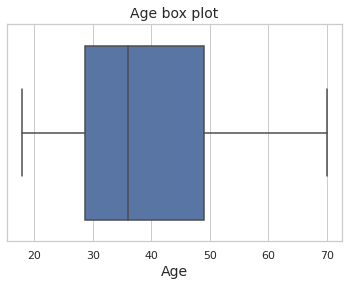

In [ ]:
# Box plot
sns.boxplot(df['Age'])
plt.title("Age box plot",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.show()

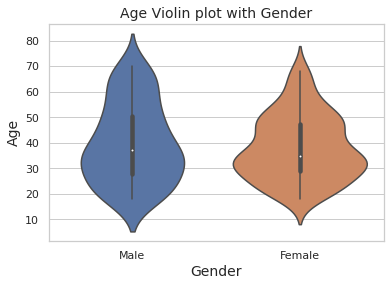

In [ ]:
# Violin Plot
sns.violinplot(y="Age", x ="Gender", data = df)
plt.title("Age Violin plot with Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()



*   Banyak Perempuan yang spending
*   Kebanyakan adalah perempuan usia 30-40



**Annual income**

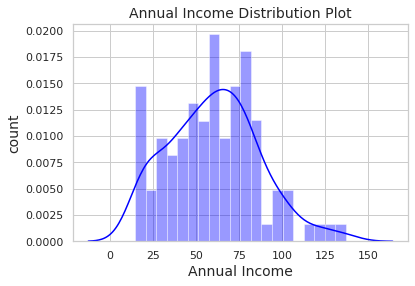

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Annual Income (k$)'], color = "blue", bins=20)
plt.title("Annual Income Distribution Plot", fontsize=14)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

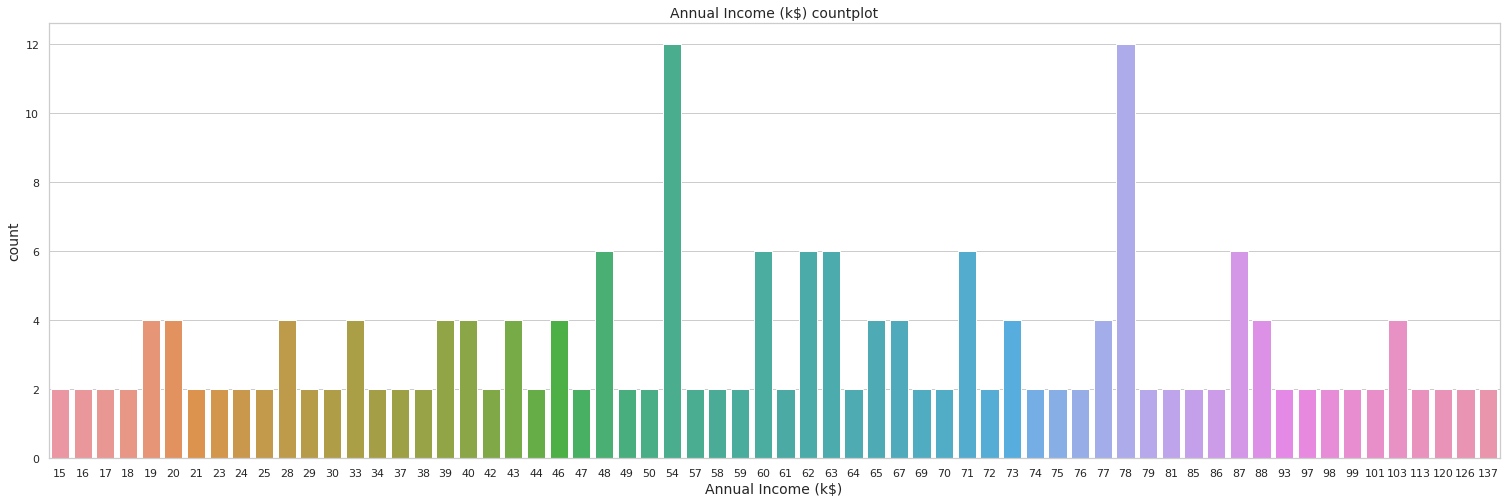

In [ ]:
# Countplot
plt.figure(figsize=(26,8))
sns.countplot(df['Annual Income (k$)'])
plt.title("Annual Income (k$) countplot", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

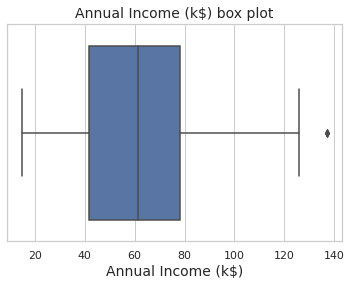

In [ ]:
# Box plot
sns.boxplot(df['Annual Income (k$)'])
plt.title("Annual Income (k$) box plot",fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.show()

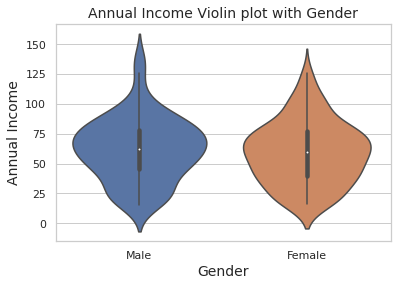

In [ ]:
# Violin Plot
sns.violinplot(y="Annual Income (k$)", x ="Gender", data = df)
plt.title("Annual Income Violin plot with Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Annual Income", fontsize=14)
plt.show()



*   Income lebih dari 130 hanya didapatkan oleh customer laki-laki
*   Rata-rata gaji lebih tinggi customer laki-laki daripada customer perempuan



**Spending Score**

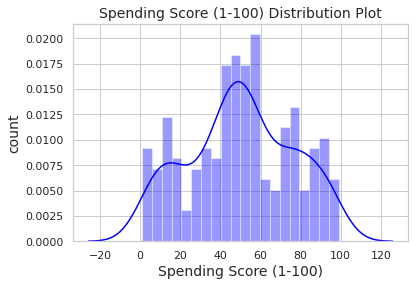

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Spending Score (1-100)'], color = "blue", bins=20)
plt.title("Spending Score (1-100) Distribution Plot", fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

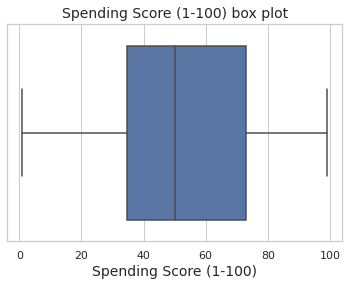

In [ ]:
# Box plot
sns.boxplot(df['Spending Score (1-100)'])
plt.title("Spending Score (1-100) box plot",fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.show()

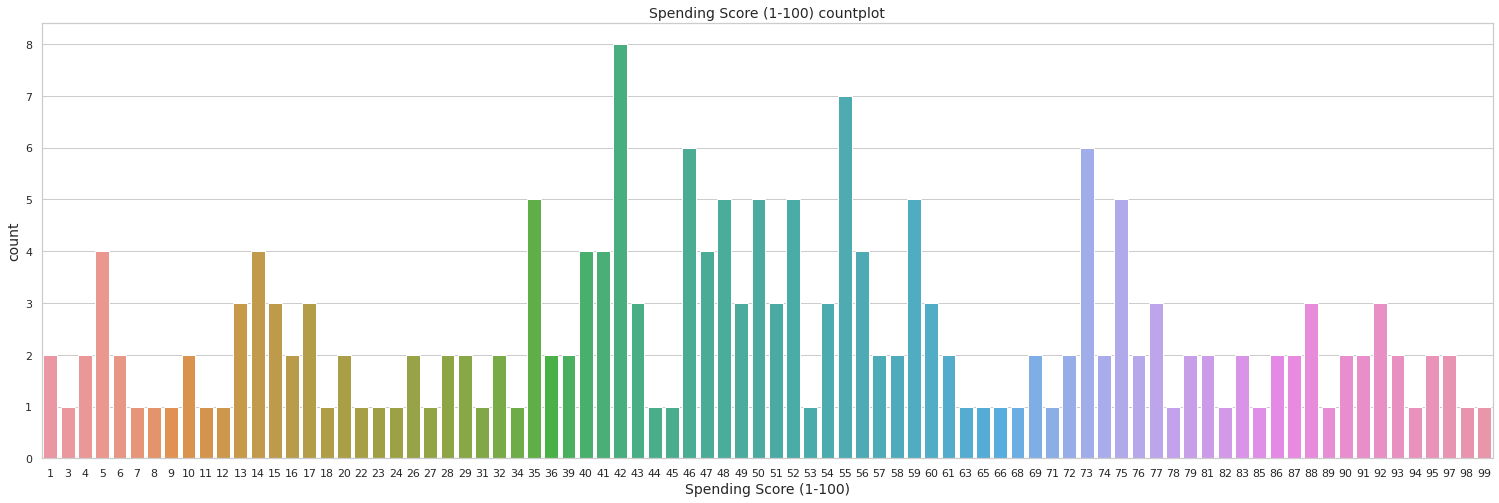

In [ ]:
# Countplot
plt.figure(figsize=(26,8))
sns.countplot(df['Spending Score (1-100)'])
plt.title("Spending Score (1-100) countplot", fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

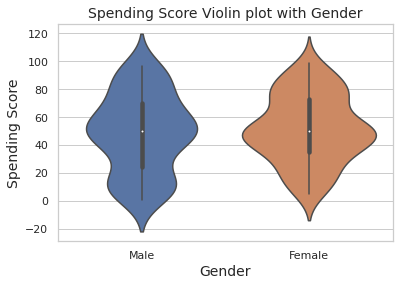

In [ ]:
# Violin Plot
sns.violinplot(y="Spending Score (1-100)", x ="Gender", data = df)
plt.title("Spending Score Violin plot with Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Spending Score", fontsize=14)
plt.show()



*   Perempuan usia 30-40 yang banyak spending dengan rata-rata spending score 40-50
*   Laki-laki usia 25-35 spending scorenya antara 40-60


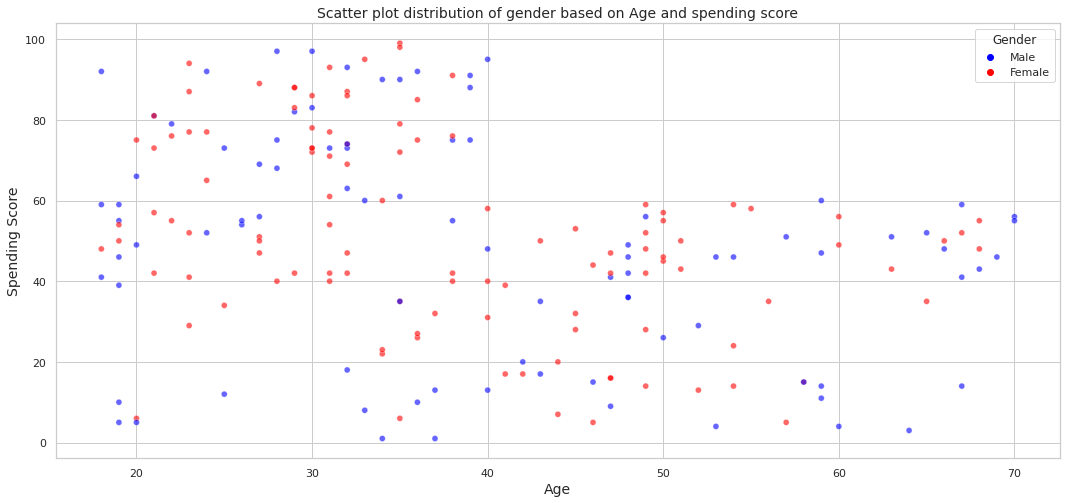

In [ ]:
# Scatter plot distribution of gender based on Age and spending score
plt.figure(figsize=(18,8))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue=df['Gender'], palette=['blue','red'], alpha=0.6)
plt.title("Scatter plot distribution of gender based on Age and spending score",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Spending Score", fontsize=14)
plt.show()



*   Dibawah usia 40, spending score semakin tinggi
*   Dibawah usia 20 lebih banyak wanita yang sering spending



# **Data Pre-Processing**

In [ ]:
df.set_index('CustomerID',inplace=True)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
# Copy Dataset
df_ss = df.copy()

In [ ]:
# Label Encoder utk gender
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_ss['Gender'] = le.fit_transform(df_ss['Gender'])
df_ss.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


# **Clustering Based on 2 Features**

## Age dan Spending Score

**K-Means & K-Means++**

In [ ]:
Age_Spend = df_ss[['Age','Spending Score (1-100)']].iloc[:,:].values
# Age_Spend

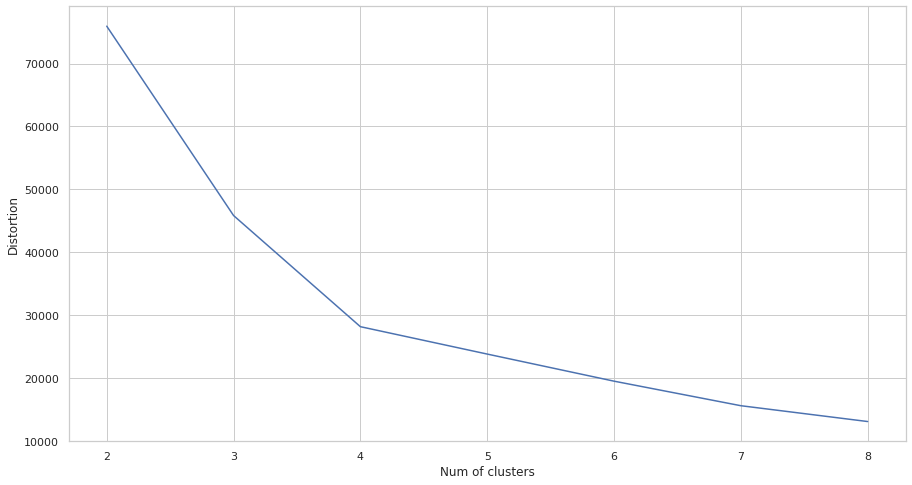

In [ ]:
# Elbow Method
inertia_list=[]

for i in range(2,9):
  kmeans_us = KMeans(n_clusters=i,n_init=10,max_iter=100, random_state=0)
  kmeans_us.fit(Age_Spend)
  inertia_list.append(kmeans_us.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(2,9),inertia_list)
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_extra.cluster import KMedoids
labels_kmedoid = KMedoids(n_clusters=4).fit_predict(Age_Spend)
labels_kmedoid

array([1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 1,
       0, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 3, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
labels_kmean_pp = KMeans(init='k-means++',n_clusters=4).fit_predict(Age_Spend)
labels_kmean_pp

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

**hierarchichal**

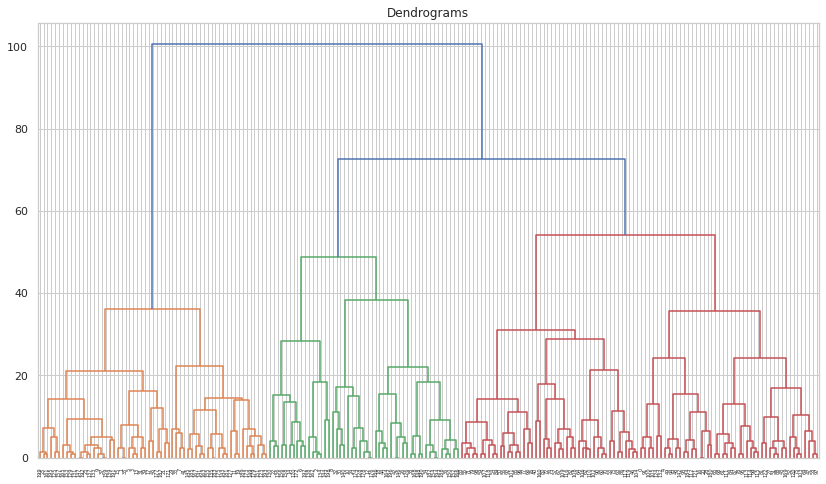

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Age_Spend, method="complete"))

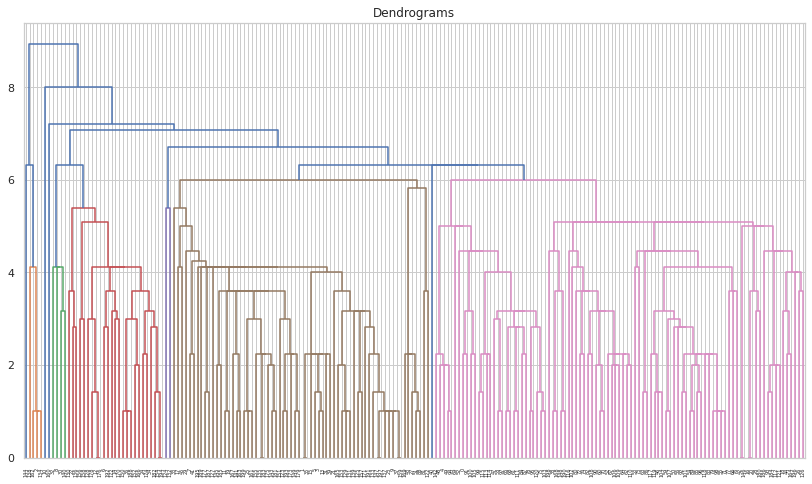

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend1 = shc.dendrogram(shc.linkage(Age_Spend, method="single"))

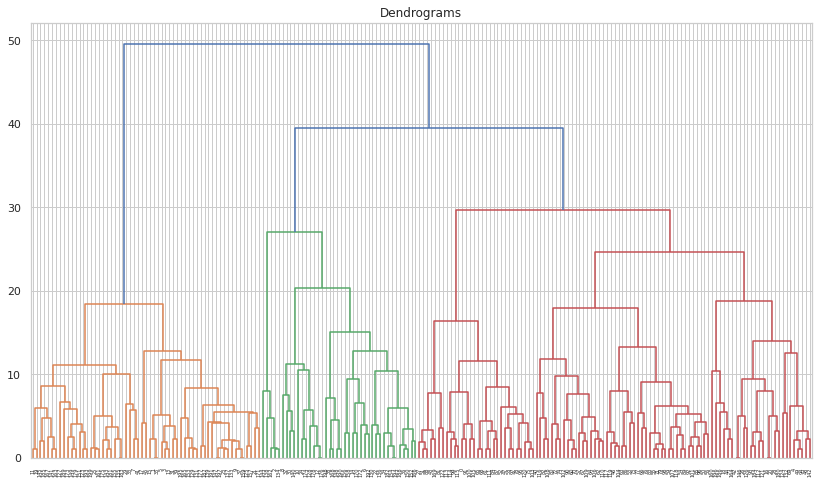

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend2 = shc.dendrogram(shc.linkage(Age_Spend, method="average"))

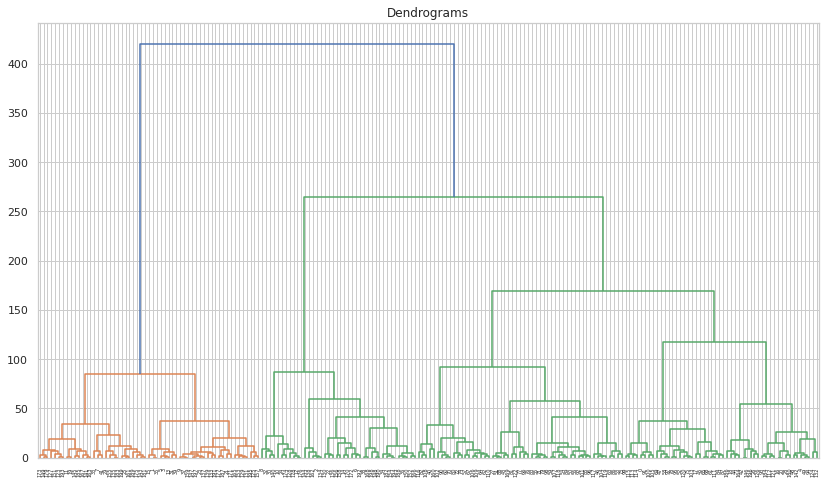

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend3 = shc.dendrogram(shc.linkage(Age_Spend, method="ward"))

In [ ]:
labels_cluster_hierarchical_Ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit_predict(Age_Spend)
labels_cluster_hierarchical_Complete = AgglomerativeClustering(n_clusters=4, linkage="complete").fit_predict(Age_Spend)

In [ ]:
labels_cluster_hierarchical_Ward

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [ ]:
labels_cluster_hierarchical_Complete

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 2,
       0, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

# **Compare Result**

**Silhouette Score and Davies Bouldin**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Medoids: ", silhouette_score(Age_Spend, labels_kmedoid), "\n")
print("Silhouette score of K-Means++: ", silhouette_score(Age_Spend, labels_kmean_pp), "\n")
print("Silhouette score of Agglo Hierarchical Ward: ", silhouette_score(Age_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Silhouette score of Agglo Hierarchical Complete: ", silhouette_score(Age_Spend, labels_cluster_hierarchical_Complete), "\n\n")

print("Davies Bouldin score of K-Medoids: ", davies_bouldin_score(Age_Spend, labels_kmedoid), "\n")
print("Davies Bouldin score of K-Means++: ", davies_bouldin_score(Age_Spend, labels_kmean_pp), "\n")
print("Davies Bouldin score of Agglo Hierarchical Ward: ", davies_bouldin_score(Age_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Davies Bouldin score of Agglo Hierarchical Complete: ", davies_bouldin_score(Age_Spend, labels_cluster_hierarchical_Complete), "\n\n")

Silhouette score of K-Medoids:  0.49888640369265486 

Silhouette score of K-Means++:  0.49973941540141753 

Silhouette score of Agglo Hierarchical Ward:  0.4602496389565028 

Silhouette score of Agglo Hierarchical Complete:  0.49294328457852726 


Davies Bouldin score of K-Medoids:  0.6886500456702762 

Davies Bouldin score of K-Means++:  0.6869328339833629 

Davies Bouldin score of Agglo Hierarchical Ward:  0.8629286547656256 

Davies Bouldin score of Agglo Hierarchical Complete:  0.6912818137334898 




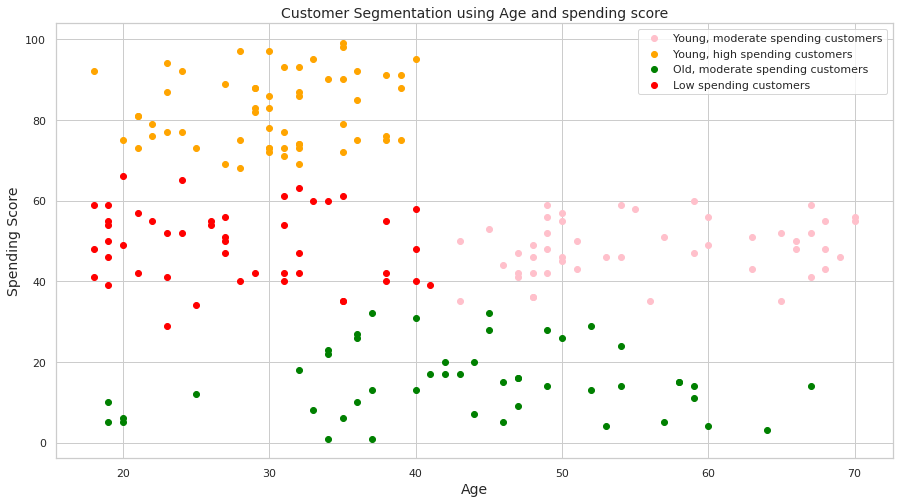

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(Age_Spend[labels_kmean_pp == 0,0], Age_Spend[labels_kmean_pp == 0,1], c = 'pink', label="Young, moderate spending customers")
plt.scatter(Age_Spend[labels_kmean_pp == 1,0], Age_Spend[labels_kmean_pp == 1,1], c = 'orange', label='Young, high spending customers')
plt.scatter(Age_Spend[labels_kmean_pp == 2,0], Age_Spend[labels_kmean_pp == 2,1], c = 'green', label='Old, moderate spending customers')
plt.scatter(Age_Spend[labels_kmean_pp == 3,0], Age_Spend[labels_kmean_pp == 3,1], c = 'red', label='Low spending customers')
plt.legend()
plt.title('Customer Segmentation using Age and spending score', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.show()

Dari hasil pengelompokan dihasilkan 4 cluster customer segmentasi terhadap spending score dan usia, dan menghasilkan kesimpulan sebagai berikut.

1.   Yang berwarna orange dan merah memiliki customer dengan usia yang relatif sama berkisar antara 20-40an
2.   Ada customer dengan usia merata daro 20an sampai 60an memiliki spending score paling rendah dibanding yang lainnya.
3.   Spending score paling tinggi dimiliki oleh kelompok usia antara 20an sampai 40 tahun.
4.   Dengan usia yang melebihi 40 tahun tidak ada yang memiliki spending score melebihi 70, itu berarti usia diatas 40 tahun tidak terlalu konsumtif.


##Annual Income dan Spending Score

In [ ]:
Inc_Spend = df_ss[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values

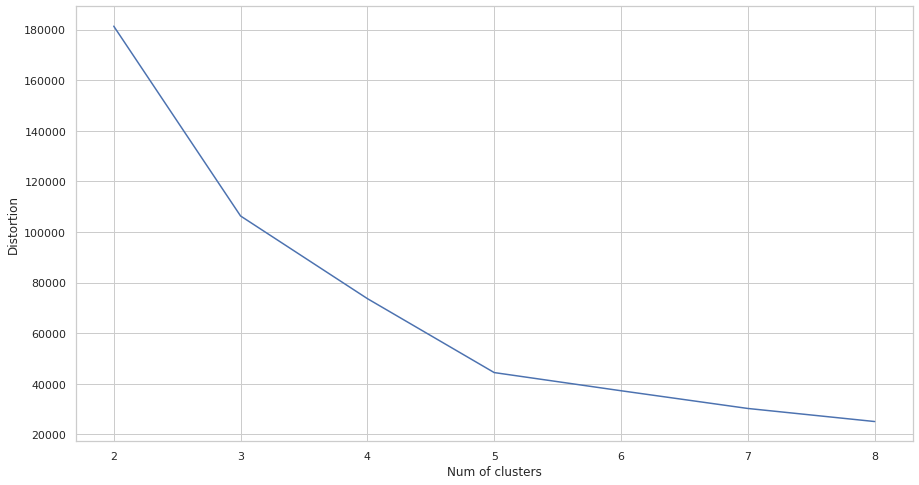

In [ ]:
# Elbow Method
inertia_list=[]

for i in range(2,9):
  kmeans_us = KMeans(n_clusters=i,n_init=10,max_iter=100, random_state=0)
  kmeans_us.fit(Inc_Spend)
  inertia_list.append(kmeans_us.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(2,9),inertia_list)
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
from sklearn_extra.cluster import KMedoids
labels_kmedoid = KMedoids(n_clusters=5).fit_predict(Inc_Spend)
labels_kmedoid

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [ ]:
labels_kmean_pp = KMeans(init='k-means++',n_clusters=5).fit_predict(Inc_Spend)
labels_kmean_pp

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

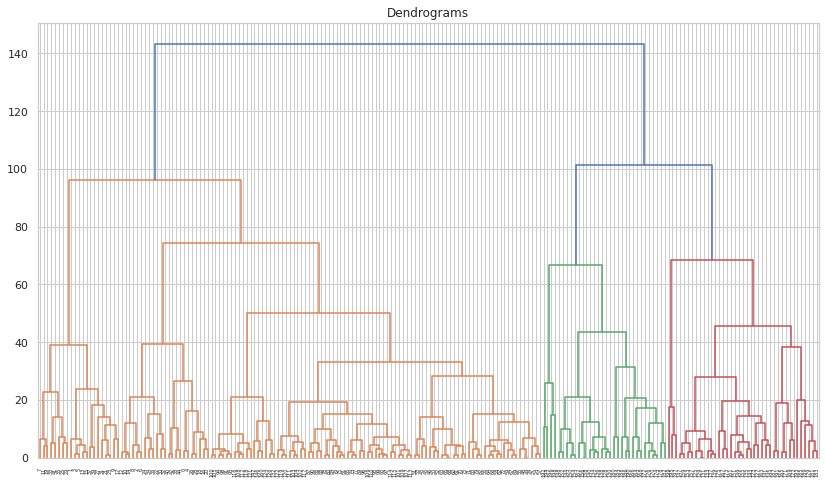

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Inc_Spend, method="complete"))

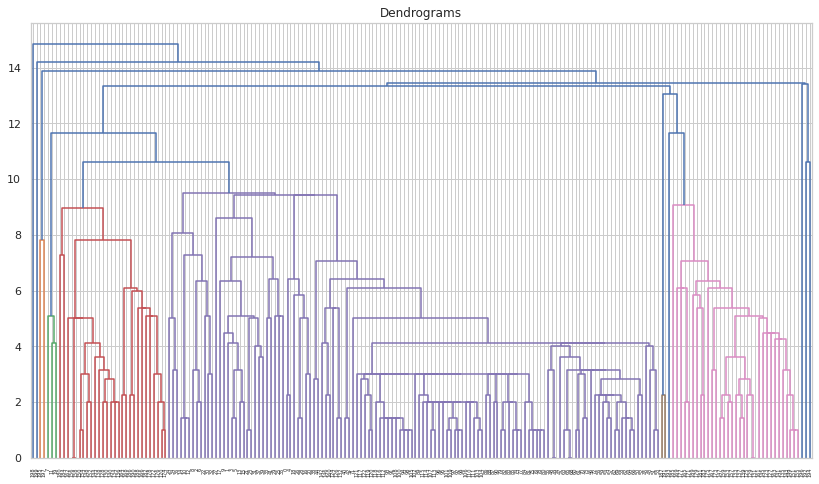

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend1 = shc.dendrogram(shc.linkage(Inc_Spend, method="single"))

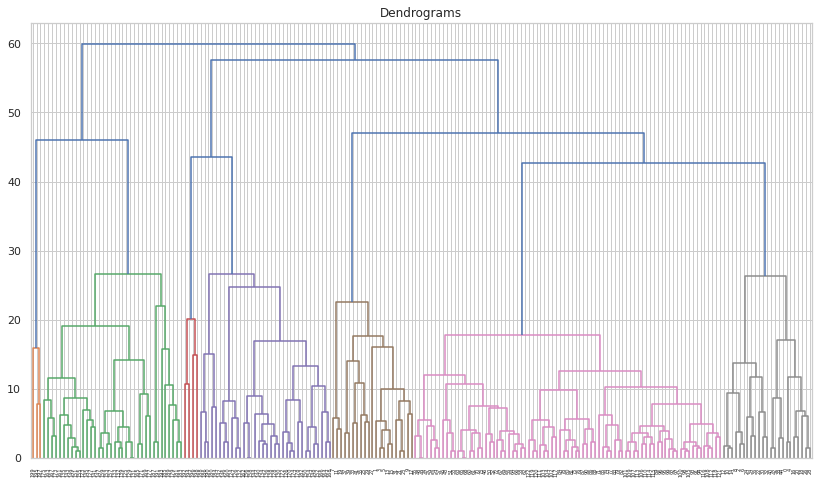

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend2 = shc.dendrogram(shc.linkage(Inc_Spend, method="average"))

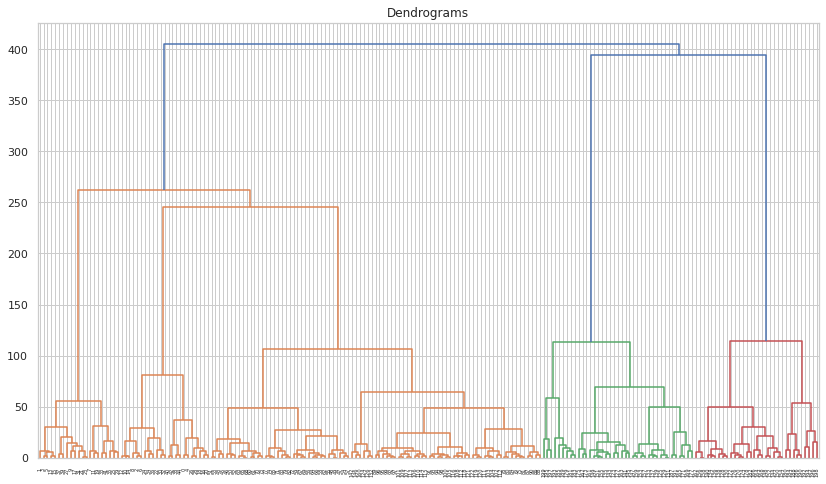

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend3 = shc.dendrogram(shc.linkage(Inc_Spend, method="ward"))

In [ ]:
labels_cluster_hierarchical_Ward = AgglomerativeClustering(n_clusters=5, linkage="ward").fit_predict(Inc_Spend)
labels_cluster_hierarchical_Complete = AgglomerativeClustering(n_clusters=5, linkage="complete").fit_predict(Inc_Spend)

In [ ]:
labels_cluster_hierarchical_Ward

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
labels_cluster_hierarchical_Complete

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

# **Compare Result**

**Silhouette Score and Davies Bouldin**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Medoids: ", silhouette_score(Inc_Spend, labels_kmedoid), "\n")
print("Silhouette score of K-Means++: ", silhouette_score(Inc_Spend, labels_kmean_pp), "\n")
print("Silhouette score of Agglo Hierarchical Ward: ", silhouette_score(Inc_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Silhouette score of Agglo Hierarchical Complete: ", silhouette_score(Inc_Spend, labels_cluster_hierarchical_Complete), "\n\n")

print("Davies Bouldin score of K-Medoids: ", davies_bouldin_score(Inc_Spend, labels_kmedoid), "\n")
print("Davies Bouldin score of K-Means++: ", davies_bouldin_score(Inc_Spend, labels_kmean_pp), "\n")
print("Davies Bouldin score of Agglo Hierarchical Ward: ", davies_bouldin_score(Inc_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Davies Bouldin score of Agglo Hierarchical Complete: ", davies_bouldin_score(Inc_Spend, labels_cluster_hierarchical_Complete), "\n\n")

Silhouette score of K-Medoids:  0.4468315848864226 

Silhouette score of K-Means++:  0.553931997444648 

Silhouette score of Agglo Hierarchical Ward:  0.5529945955148897 

Silhouette score of Agglo Hierarchical Complete:  0.5529945955148897 


Davies Bouldin score of K-Medoids:  0.7634480661738675 

Davies Bouldin score of K-Means++:  0.5725628995597086 

Davies Bouldin score of Agglo Hierarchical Ward:  0.5782207452369452 

Davies Bouldin score of Agglo Hierarchical Complete:  0.5782207452369452 




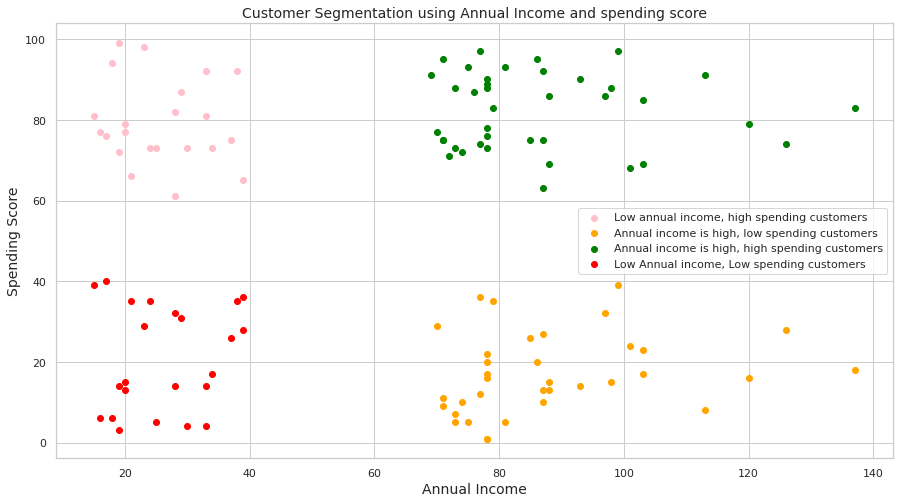

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(Inc_Spend[labels_kmean_pp == 0,0], Inc_Spend[labels_kmean_pp == 0,1], c = 'pink', label="Low annual income, high spending customers")
plt.scatter(Inc_Spend[labels_kmean_pp == 1,0], Inc_Spend[labels_kmean_pp == 1,1], c = 'orange', label='Annual income is high, low spending customers')
plt.scatter(Inc_Spend[labels_kmean_pp == 2,0], Inc_Spend[labels_kmean_pp == 2,1], c = 'green', label='Annual income is high, high spending customers')
plt.scatter(Inc_Spend[labels_kmean_pp == 3,0], Inc_Spend[labels_kmean_pp == 3,1], c = 'red', label='Low Annual income, Low spending customers')
plt.legend()
plt.title('Customer Segmentation using Annual Income and spending score', fontsize=14)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.show()

Untuk pengelompokan berdasarkan Annual income dan Spending Score

1.   Ada 2 kelompok customer dengan Annual income kecil dan memiliki spending score yang variatif, hampir tersebar secara merata antara 0 sampai 100
2.   Sedangkan untuk kelompok yang memiliki annual income tinggi juga sama, ada yang memiliki spending score rendah dan tinggi
3.   Yang menarik disini hampir tidak ada kelompok customer yang memiliki annual income 40-60an dan spending Score 40-60an.

